# Importing the Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plt_img
import seaborn as sns
import os
import warnings
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.metrics import classification_report , confusion_matrix

In [40]:
warnings.filterwarnings('ignore')

# Reading the Image Data

In [2]:
mytrain = "training/"

In [3]:
mytest = "testing/"

In [4]:
os.listdir(mytrain)

['no_tumor', 'meningioma_tumor', 'glioma_tumor', 'pituitary_tumor']

In [5]:
os.listdir(mytest)

['no_tumor', 'meningioma_tumor', 'glioma_tumor', 'pituitary_tumor']

In [6]:
glioma_tumor = mytrain+"/glioma_tumor/gg (1).jpg"

In [7]:
glioma_tumor

'training//glioma_tumor/gg (1).jpg'

In [8]:
glioma_image=plt_img.imread(glioma_tumor)

In [9]:
glioma_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

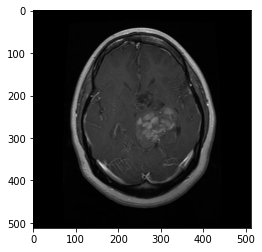

In [10]:
plt.imshow(glioma_image)
plt.show()

In [11]:
glioma_image.shape

(512, 512, 3)

In [12]:
pituitary_tumor_train = mytrain+"/pituitary_tumor/p (1).jpg"

In [13]:
pituitary_tumor_train

'training//pituitary_tumor/p (1).jpg'

In [14]:
pituitary_image_train = plt_img.imread(pituitary_tumor_train)

In [15]:
pituitary_image_train

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

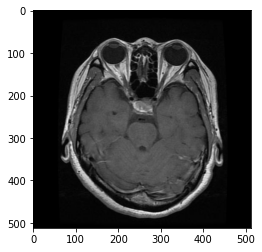

In [16]:
plt.imshow(pituitary_image_train)
plt.show()

In [17]:
pituitary_image_train.shape

(512, 512, 3)

In [18]:
pituitary_image_test = mytest+"/pituitary_tumor/image(1).jpg"

In [19]:
pituitary_image_test

'testing//pituitary_tumor/image(1).jpg'

In [20]:
pituitary_image_test=plt_img.imread(pituitary_image_test)

In [21]:
pituitary_image_test

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

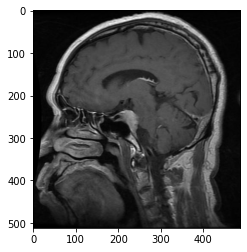

In [22]:
plt.imshow(pituitary_image_test)
plt.show()

In [23]:
pituitary_image_test.shape

(512, 488, 3)

# Analyzing Image Dimensions

In [24]:
dim1 = []
dim2 = []

In [25]:
for images in os.listdir(mytrain+"/pituitary_tumor/"):
    img = plt_img.imread(mytrain+"/pituitary_tumor/"+images)
    (d1,d2,colors) = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [26]:
dim3 = []
dim4  = []

In [27]:
for images in os.listdir(mytrain+"/glioma_tumor/"):
    img = plt_img.imread(mytrain+"/glioma_tumor/"+images)
    (d1,d2,colors) = img.shape
    dim3.append(d1)
    dim4.append(d2)

In [28]:
dim5 = []
dim6 = []

In [29]:
for images in os.listdir(mytest+"/glioma_tumor/"):
    img = plt_img.imread(mytest+"/glioma_tumor/"+images)
    (d1,d2,colors) = img.shape
    dim5.append(d1)
    dim6.append(d2)

In [30]:
dim7 = []
dim8 = []

In [31]:
for images in os.listdir(mytest+"pituitary_tumor/"):
    img = plt_img.imread(mytest+"pituitary_tumor/"+images)
    (d1,d2,colors) = img.shape
    dim7.append(d1)
    dim8.append(d2)

In [32]:
np.mean(dim7)

590.472972972973

In [33]:
np.mean(dim6)

407.75

In [34]:
np.mean(dim8)

597.7162162162163

In [35]:
img_shape = (128,128,3)

In [36]:
sns.set_style('darkgrid')

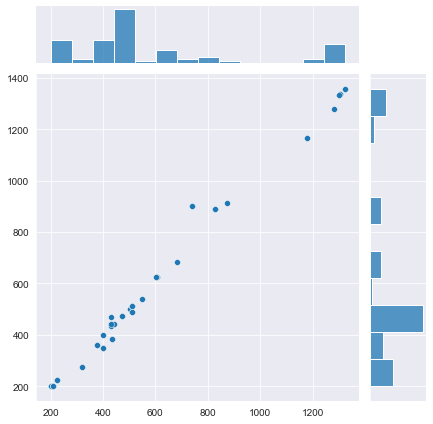

In [41]:
sns.jointplot(dim7,dim8)

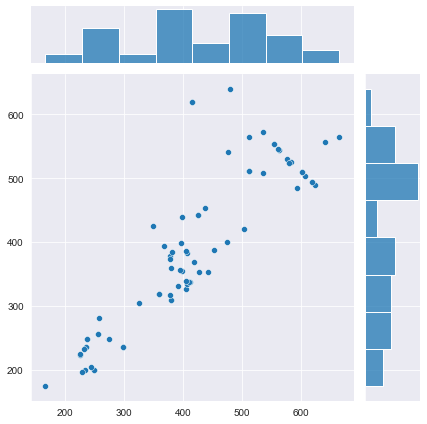

In [42]:
sns.jointplot(dim5,dim6)

# Normalising Image Size

In [51]:
data = "tumor_final_dataset"

In [52]:
data

'tumor_final_dataset'

In [53]:
os.listdir(data)

['new_testing', 'new_training', 'testing', 'training']

In [54]:
testpath = "tumor_final_dataset\\testing\\"
trainpath = "tumor_final_dataset\\training\\"

In [55]:
os.listdir(testpath)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [56]:
os.listdir(trainpath)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [57]:
listoftumors = os.listdir(trainpath)

In [58]:
listoftumors

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [59]:
for tumor in listoftumors:
    #print(trainpath+tumor+"\\")
    tumorpath =trainpath+tumor+"\\"
    for image in os.listdir(tumorpath):
        im = Image.open(tumorpath + image)
        resizedimages = im.resize((128,128))
        resizedimages.save("tumor_final_dataset\\new_training\\"+ tumor +"\\"+ image)

In [60]:
no_tumor_new=os.listdir("tumor_final_dataset\\new_training\\no_tumor")

In [62]:
no_image_new = "tumor_final_dataset\\new_training\\no_tumor\\1.jpg"

In [63]:
no_image_new

'tumor_final_dataset\\new_training\\no_tumor\\1.jpg'

In [64]:
image_new=plt_img.imread(no_image_new)

In [65]:
image_new

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

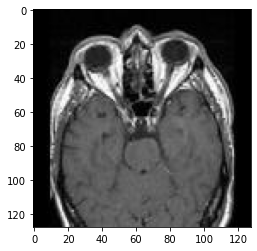

In [66]:
plt.imshow(image_new)

In [67]:
# image_new.shape

(128, 128, 3)

In [68]:
for tumor in listoftumors:
    #print(testpath+tumor+"\\")
    tumorpaths =testpath+tumor+"\\"
    for images in os.listdir(tumorpaths):
        im = Image.open(tumorpaths + images)
        resizeddimages = im.resize((128,128))
        resizeddimages.save("tumor_final_dataset\\new_testing\\"+ tumor +"\\"+ images)

In [69]:
glioma_tumor_new=os.listdir("tumor_final_dataset\\new_testing\\glioma_tumor")

In [71]:
glioma_image_new = "tumor_final_dataset\\new_testing\\glioma_tumor\\image(1).jpg"

In [72]:
glioma_image_new

'tumor_final_dataset\\new_testing\\glioma_tumor\\image(1).jpg'

In [73]:
_image_new=plt_img.imread(glioma_image_new)

In [74]:
_image_new

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

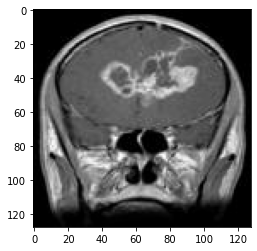

In [75]:
plt.imshow(_image_new)

In [76]:
_image_new.shape

(128, 128, 3)

# Data Augmentation

In [43]:
img_generator=ImageDataGenerator(rotation_range=20,width_shift_range=0.1,rescale=1/255,
                  height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,
                  horizontal_flip=True,fill_mode="nearest")

In [44]:
img_generator

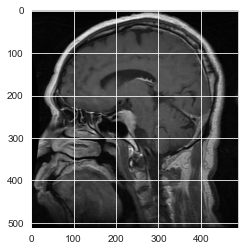

In [45]:
plt.imshow(pituitary_image_test)
plt.show()

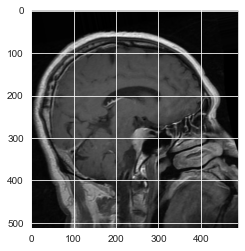

In [46]:
plt.imshow(img_generator.random_transform(pituitary_image_test))
plt.show()

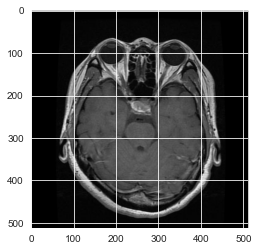

In [47]:
plt.imshow(pituitary_image_train)
plt.show()

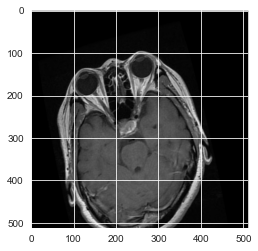

In [48]:
plt.imshow(img_generator.random_transform(pituitary_image_train))
plt.show()

# Reading Resized Images

In [51]:
# mytrain_new = "tumor_final_dataset\\new_training\\"
# mytest_new = "tumor_final_dataset\\new_testing\\"

new_images = "new images/"
mytrain_new = new_images + "training/"
mytest_new = new_images + "testing/"

In [53]:
train_img = []
train_labels = []


test_img= []
test_labels = []

path_train = (mytrain_new)
path_test = (mytest_new)

for i in os.listdir(path_train):
    for j in os.listdir(path_train+"/"+i):
        train_img.append (plt_img.imread(path_train+i+'/'+j))
        train_labels.append(i)
        
for i in os.listdir(path_test):
    for j in os.listdir(path_test+"/"+i):
        test_img.append (plt_img.imread(path_test+i+'/'+j))
        test_labels.append(i)
        
train_img = (np.array(train_img))
test_img = (np.array(test_img))


train_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(train_labels)]
test_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(test_labels)]

In [54]:
train_label_arr = np.array(train_labels)
test_label_arr = np.array(test_labels)

In [55]:
cat_train = to_categorical(train_labels_encoded)
cat_test = to_categorical(test_labels_encoded)

In [56]:
img_generator.fit(train_img)
img_generator.fit(test_img)

In [57]:
img_generator.flow_from_directory(mytrain_new)

Found 2870 images belonging to 4 classes.


In [58]:
img_generator.flow_from_directory(mytest_new)

Found 394 images belonging to 4 classes.


# Building the Convolutional Neural Network

In [94]:
model = Sequential()
model.add(Conv2D(filters=128,kernel_size=(4,4),input_shape=img_shape,activation="relu"))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Conv2D(filters=128,kernel_size=(4,4),input_shape=img_shape,activation="relu"))
model.add(MaxPool2D(pool_size=(3,3)))
          
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=img_shape,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
          
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4,activation = "softmax"))       

In [95]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 125, 125, 128)     6272      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 41, 41, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 38, 128)       262272    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

# Hyperparameter Tuning

In [96]:
adm = Adam(learning_rate=0.001)

In [97]:
model.compile(optimizer=adm,loss="categorical_crossentropy",metrics=["accuracy"])

In [98]:
early_stop = EarlyStopping(patience=3,monitor='val_accuracy')

# Training the Network

In [99]:
model.fit(x=train_img,y=cat_train,
validation_data=(test_img,cat_test),
epochs=80,callbacks=[early_stop],
batch_size=32)

Epoch 1/80
99/99 [==============================] - 154s 2s/step - loss: 2.2184 - accuracy: 0.3851 - val_loss: 1.4858 - val_accuracy: 0.2081
Epoch 2/80
99/99 [==============================] - 151s 2s/step - loss: 1.2079 - accuracy: 0.4680 - val_loss: 1.5405 - val_accuracy: 0.2056
Epoch 3/80
99/99 [==============================] - 153s 2s/step - loss: 1.1748 - accuracy: 0.4642 - val_loss: 1.5946 - val_accuracy: 0.2208
Epoch 4/80
99/99 [==============================] - 151s 2s/step - loss: 1.1441 - accuracy: 0.4915 - val_loss: 1.4832 - val_accuracy: 0.2792
Epoch 5/80
99/99 [==============================] - 153s 2s/step - loss: 1.0930 - accuracy: 0.5203 - val_loss: 1.4916 - val_accuracy: 0.3071
Epoch 6/80
99/99 [==============================] - 151s 2s/step - loss: 1.0531 - accuracy: 0.5272 - val_loss: 1.4386 - val_accuracy: 0.3503
Epoch 7/80
99/99 [==============================] - 153s 2s/step - loss: 1.0126 - accuracy: 0.5652 - val_loss: 1.5374 - val_accuracy: 0.3299
Epoch 8/80
99

In [100]:
history=model.history.history

In [101]:
history

{'loss': [2.218388795852661,
  1.2078797817230225,
  1.1748331785202026,
  1.1440722942352295,
  1.0930156707763672,
  1.053136944770813,
  1.012563943862915,
  0.9721144437789917,
  0.8610896468162537,
  0.8017348051071167,
  0.6953818202018738,
  0.6556767821311951,
  0.6113507747650146,
  0.546988844871521,
  0.5010887384414673,
  0.5048108100891113,
  0.46936240792274475,
  0.40390992164611816,
  0.4015827476978302,
  0.36681148409843445,
  0.36694246530532837,
  0.40505436062812805,
  0.3739774227142334,
  0.31803610920906067,
  0.27212411165237427,
  0.2560769021511078,
  0.26117199659347534,
  0.2389664500951767,
  0.267372190952301,
  0.24965476989746094,
  0.23771913349628448,
  0.17202019691467285,
  0.1539132297039032,
  0.17979000508785248,
  0.16718848049640656,
  0.14438557624816895,
  0.19768443703651428,
  0.1701325625181198,
  0.16216693818569183],
 'accuracy': [0.38512659072875977,
  0.4680379629135132,
  0.46424052119255066,
  0.49145570397377014,
  0.520253181457519

# Saving the Network

In [102]:
model.save("TUMOR_FINAL_MODEL.h5")

In [59]:
final_model = load_model("TUMOR_FINAL_MODEL.h5")

2021-11-16 15:43:33.523251: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [60]:
final_model

# Evaluating Network Performance

In [105]:
df= pd.DataFrame(model.history.history)

<AxesSubplot:>

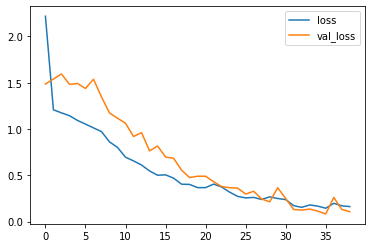

In [107]:
df[["loss","val_loss"]].plot()

<AxesSubplot:>

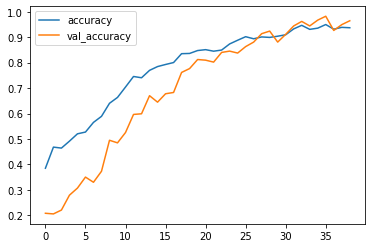

In [108]:
df[["accuracy","val_accuracy"]].plot()

# Testing the Network

In [113]:
test_predictions  = final_model.predict(test_img)

In [114]:
test_predictions

array([[3.5870984e-05, 9.8662865e-01, 1.3332329e-02, 3.1274594e-06],
       [1.7957921e-01, 8.1582129e-01, 4.5963898e-03, 3.1301458e-06],
       [9.3935348e-02, 7.5736141e-01, 1.1214217e-01, 3.6561042e-02],
       ...,
       [2.2499453e-14, 5.5784130e-19, 2.0849347e-11, 1.0000000e+00],
       [1.9163312e-05, 5.7304288e-07, 2.8578599e-04, 9.9969447e-01],
       [4.3784464e-19, 2.5419151e-24, 1.0587397e-15, 1.0000000e+00]],
      dtype=float32)

In [116]:
test_predictions.shape

(394, 4)

In [119]:
test_predictions[10]

array([2.0924002e-02, 8.7389356e-01, 1.0518152e-01, 9.7487907e-07],
      dtype=float32)

In [120]:
test_predictions[155]

array([5.5116201e-03, 2.6238808e-01, 7.3204941e-01, 5.0993498e-05],
      dtype=float32)

In [121]:
test_predictions[300]

array([8.7308288e-01, 1.0298679e-01, 2.3594115e-02, 3.3622660e-04],
      dtype=float32)

In [122]:
final_predictions = np.argmax(test_predictions , axis=1)

In [123]:
final_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [126]:
print(classification_report(test_labels_encoded,final_predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       105
           1       0.93      0.97      0.95       100
           2       0.94      0.96      0.95       115
           3       1.00      0.99      0.99        74

    accuracy                           0.96       394
   macro avg       0.97      0.97      0.97       394
weighted avg       0.97      0.96      0.96       394



In [127]:
confusion_matrix(test_labels_encoded,final_predictions)

array([[100,   2,   3,   0],
       [  0,  97,   3,   0],
       [  0,   5, 110,   0],
       [  0,   0,   1,  73]], dtype=int64)